In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [4]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

1. Import the data with information on people infected with dengue at the district level for 2015 to 2021.

In [5]:
data_dengue = pd.read_csv(r'../../_data/data_dengue_peru.csv')

D:\Users\angie.quispe\AppData\Local\Temp\ipykernel_13908\1332449136.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_dengue = pd.read_csv(r'../../_data/data_dengue_peru.csv')


In [6]:
data_dengue.head(4)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0


Some cases in Ubigeo have 5 numbers instead of 6. This is due to an error when importing as that deletes the initial character for the cases that start with a 0. We will add a 0 at the beggining for those cases with less than 6 numbers. 

In [7]:
data_dengue['Ubigeo'] = data_dengue['Ubigeo'].astype(str)

In [8]:
data_dengue['Ubigeo'] = data_dengue['Ubigeo'].str.zfill(6)

In [9]:
data_dengue.head(4)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0


## 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers.

In [10]:
data_dengue['cod_dep'] = data_dengue['Ubigeo'].apply(lambda x: str(x)[:2])
data_dengue['cod_prov'] = data_dengue['Ubigeo'].apply(lambda x: str(x)[:4])

In [11]:
data_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,cod_dep,cod_prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [12]:
dist_shape = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [13]:
dist_shape.rename(columns={'UBIGEO': 'Ubigeo'}, inplace=True)
dist_shape.rename(columns={'NOMBDEP': 'Departamento'}, inplace=True)
dist_shape.rename(columns={'NOMBPROV': 'Provincia'}, inplace=True)
dist_shape.rename(columns={'NOMBDIST': 'Distrito'}, inplace=True)

In [14]:
dist_shape = dist_shape[['Departamento','Provincia','Distrito','Ubigeo', 'geometry']]

In [15]:
dist_shape

,Departamento,Provincia,Distrito,Ubigeo,geometry
0,CAJAMARCA,CONTUMAZA,GUZMANGO,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,CAJAMARCA,SAN MIGUEL,EL PRADO,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,CAJAMARCA,SAN MIGUEL,NIEPOS,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,CAJAMARCA,SAN MIGUEL,SAN GREGORIO,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,CAJAMARCA,SAN PABLO,SAN LUIS,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...
1869,AREQUIPA,CASTILLA,CHACHAS,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,AREQUIPA,CASTILLA,CHILCAYMARCA,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,AREQUIPA,CASTILLA,CHOCO,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,AREQUIPA,CASTILLA,HUANCARQUI,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [16]:
data_2021 = data_dengue.loc[data_dengue["Año"]== 2021]

In [17]:
data_2021

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,cod_dep,cod_prov
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,1501
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


Agrupar por distrito y sumar los casos


In [18]:
data_2021['Casos'] = pd.to_numeric(data_2021['Casos'], errors='coerce').fillna(0)

D:\Users\angie.quispe\AppData\Local\Temp\ipykernel_13908\2374177232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Casos'] = pd.to_numeric(data_2021['Casos'], errors='coerce').fillna(0)


In [19]:
data_2021_agregado = data_2021.groupby(['Año','Ubigeo',  'Departamento', 'Provincia', 'Distrito'], as_index=False).agg({
    'Casos': 'sum',            # Sumamos los casos de dengue
    # 'geometry': 'first' no se incluye aquí porque se manejará en el paso siguiente
})

In [20]:
data_2021_agregado

,Año,Ubigeo,Departamento,Provincia,Distrito,Casos
0,2021,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0.0
1,2021,010201,AMAZONAS,BAGUA,BAGUA,474.0
2,2021,010202,AMAZONAS,BAGUA,ARAMANGO,25.0
3,2021,010203,AMAZONAS,BAGUA,COPALLIN,38.0
4,2021,010204,AMAZONAS,BAGUA,EL PARCO,8.0
...,...,...,...,...,...,...
464,2021,250302,UCAYALI,PADRE ABAD,IRAZOLA,26.0
465,2021,250303,UCAYALI,PADRE ABAD,CURIMANA,32.0
466,2021,250304,UCAYALI,PADRE ABAD,NESHUYA,14.0
467,2021,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,2.0


In [21]:
data_shape21 = dist_shape.copy()

In [22]:
data_shape21['Año'] = 2021

In [23]:
data_shape21

,Departamento,Provincia,Distrito,Ubigeo,geometry,Año
0,CAJAMARCA,CONTUMAZA,GUZMANGO,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",2021
1,CAJAMARCA,SAN MIGUEL,EL PRADO,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",2021
2,CAJAMARCA,SAN MIGUEL,NIEPOS,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",2021
3,CAJAMARCA,SAN MIGUEL,SAN GREGORIO,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",2021
4,CAJAMARCA,SAN PABLO,SAN LUIS,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",2021
...,...,...,...,...,...,...
1869,AREQUIPA,CASTILLA,CHACHAS,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",2021
1870,AREQUIPA,CASTILLA,CHILCAYMARCA,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",2021
1871,AREQUIPA,CASTILLA,CHOCO,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",2021
1872,AREQUIPA,CASTILLA,HUANCARQUI,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",2021


In [24]:
dataset21 = pd.merge(data_2021_agregado, data_shape21, how="right", on=["Ubigeo", "Departamento", "Provincia", "Distrito"])

In [25]:
dataset21

,Año_x,Ubigeo,Departamento,Provincia,Distrito,Casos,geometry,Año_y
0,NaN,060504,CAJAMARCA,CONTUMAZA,GUZMANGO,NaN,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",2021
1,NaN,061105,CAJAMARCA,SAN MIGUEL,EL PRADO,NaN,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",2021
2,NaN,061109,CAJAMARCA,SAN MIGUEL,NIEPOS,NaN,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",2021
3,NaN,061110,CAJAMARCA,SAN MIGUEL,SAN GREGORIO,NaN,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",2021
4,NaN,061203,CAJAMARCA,SAN PABLO,SAN LUIS,NaN,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",2021
...,...,...,...,...,...,...,...,...
1869,NaN,040404,AREQUIPA,CASTILLA,CHACHAS,NaN,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",2021
1870,NaN,040405,AREQUIPA,CASTILLA,CHILCAYMARCA,NaN,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",2021
1871,NaN,040406,AREQUIPA,CASTILLA,CHOCO,NaN,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",2021
1872,NaN,040407,AREQUIPA,CASTILLA,HUANCARQUI,NaN,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",2021


In [26]:
dataset21 = gpd.GeoDataFrame(dataset21, geometry='geometry')

<Axes: >

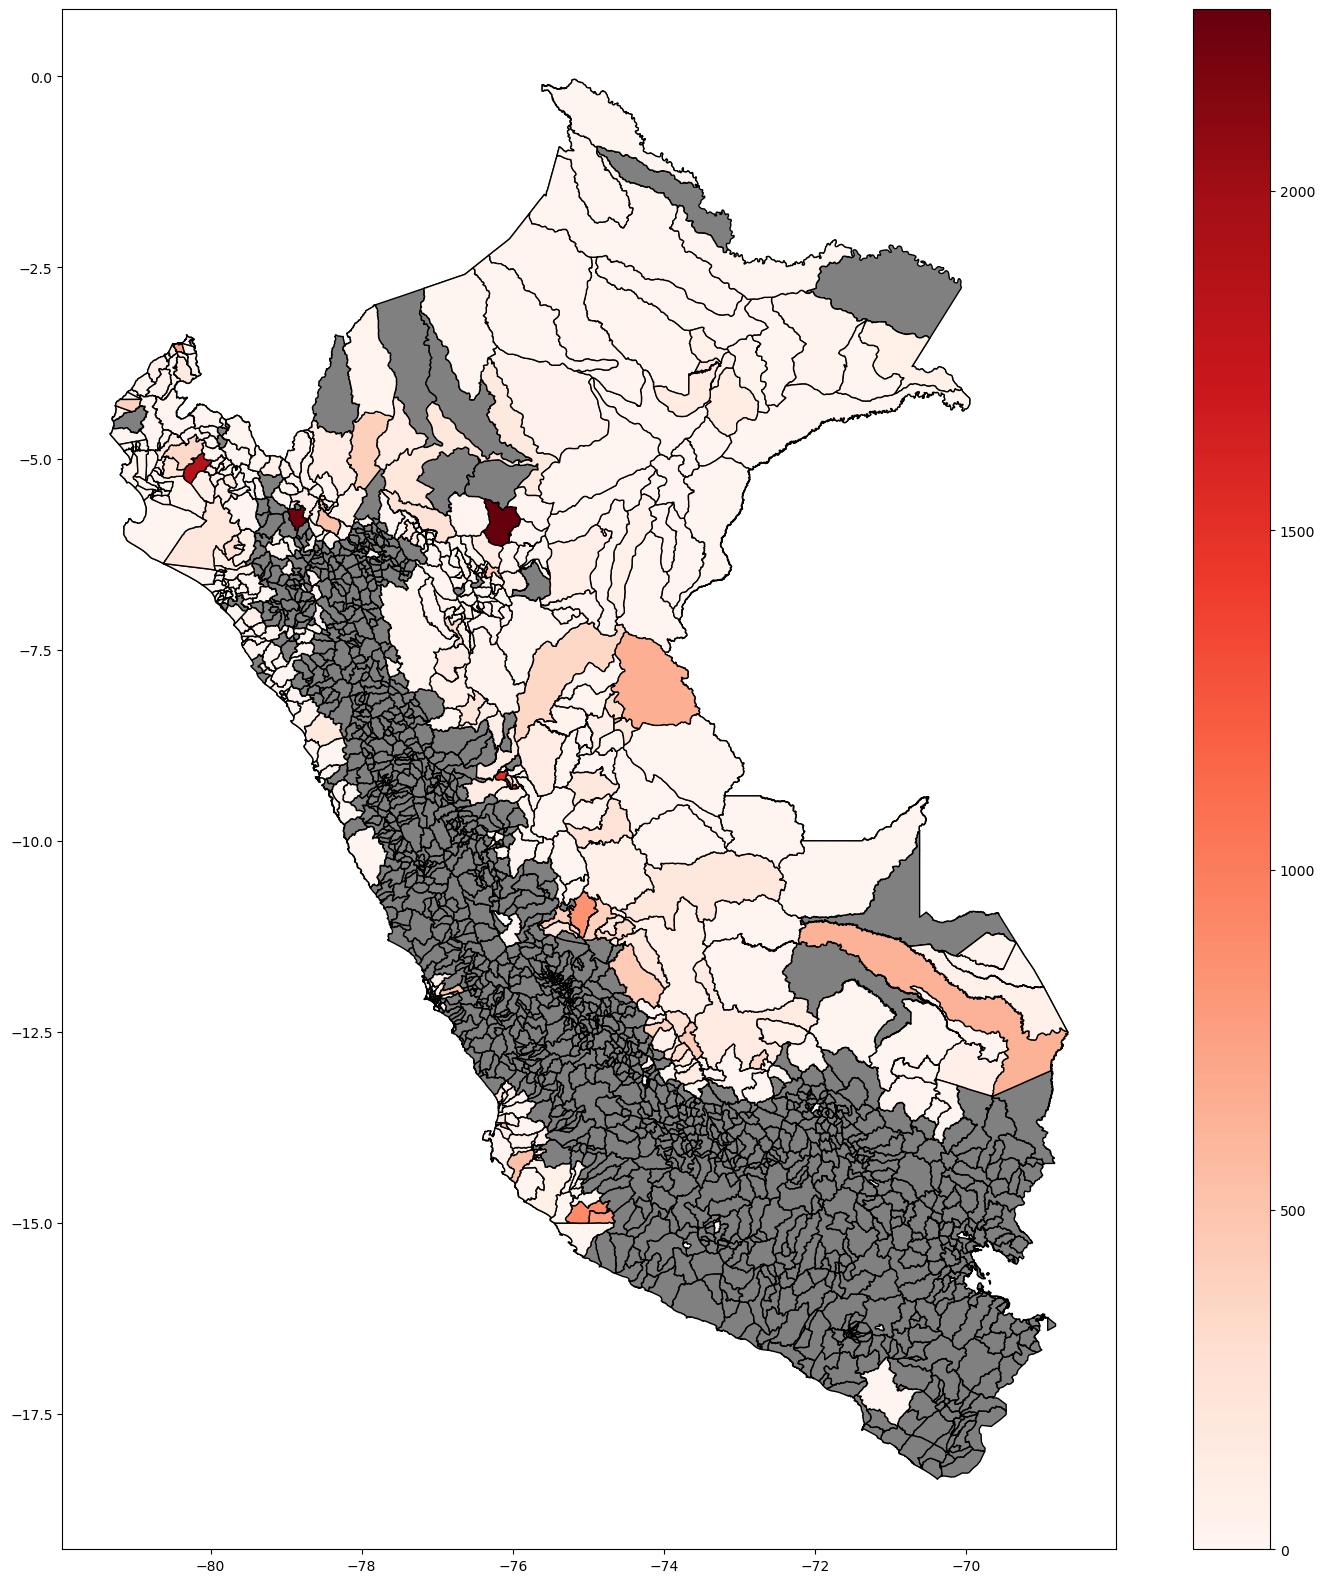

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))

# Primero, dibuja todos los polígonos con un color base que representará los valores NaN.
# Puedes elegir un color que claramente indique que los datos están ausentes, como 'lightgrey'.
dataset21.plot(ax=ax, color='grey', edgecolor='black')

# Luego, dibuja encima solo aquellos polígonos que tienen un valor no-NaN en 'Casos'.
dataset21.dropna(subset=['Casos']).plot(column='Casos', cmap='Reds', 
                                         edgecolor='black', legend=True, ax=ax)


4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values.

4.1 First, we group by province and add up the cases.

In [43]:
data_2021_province = data_2021.groupby(['Año','Ubigeo',  'Departamento', 'Provincia'], as_index=False).agg({
    'Casos': 'sum',            # We added the cases of dengue fever
    # 'geometry': 'first' no se incluye aquí porque se manejará en el paso siguiente
})

In [44]:
data_2021_province

,Año,Ubigeo,Departamento,Provincia,Casos
0,2021,010101,AMAZONAS,CHACHAPOYAS,0.0
1,2021,010201,AMAZONAS,BAGUA,474.0
2,2021,010202,AMAZONAS,BAGUA,25.0
3,2021,010203,AMAZONAS,BAGUA,38.0
4,2021,010204,AMAZONAS,BAGUA,8.0
...,...,...,...,...,...
464,2021,250302,UCAYALI,PADRE ABAD,26.0
465,2021,250303,UCAYALI,PADRE ABAD,32.0
466,2021,250304,UCAYALI,PADRE ABAD,14.0
467,2021,250305,UCAYALI,PADRE ABAD,2.0


In [45]:
data_shape_provinc = dist_shape.copy()

In [46]:
data_shape_provinc

,Departamento,Provincia,Distrito,Ubigeo,geometry
0,CAJAMARCA,CONTUMAZA,GUZMANGO,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,CAJAMARCA,SAN MIGUEL,EL PRADO,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,CAJAMARCA,SAN MIGUEL,NIEPOS,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,CAJAMARCA,SAN MIGUEL,SAN GREGORIO,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,CAJAMARCA,SAN PABLO,SAN LUIS,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...
1869,AREQUIPA,CASTILLA,CHACHAS,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,AREQUIPA,CASTILLA,CHILCAYMARCA,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,AREQUIPA,CASTILLA,CHOCO,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,AREQUIPA,CASTILLA,HUANCARQUI,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [47]:
geo_data_provincia = data_shape_provinc.dissolve(by='Provincia', aggfunc='first').reset_index()

In [48]:
dataset21_province = pd.merge(data_2021_province, geo_data_provincia , how="right", on=["Ubigeo", "Departamento", "Provincia"])

In [49]:
dataset21_province 

,Año,Ubigeo,Departamento,Provincia,Casos,geometry,Distrito
0,NaN,030108,APURIMAC,ABANCAY,NaN,"POLYGON ((-73.00899 -14.11630, -73.01195 -14.1...",SAN PEDRO DE CACHORA
1,NaN,090204,HUANCAVELICA,ACOBAMBA,NaN,"POLYGON ((-74.43766 -12.80049, -74.43662 -12.8...",CAJA
2,NaN,080201,CUSCO,ACOMAYO,NaN,"POLYGON ((-71.45181 -14.05337, -71.45115 -14.0...",ACOMAYO
3,NaN,020205,ANCASH,AIJA,NaN,"POLYGON ((-77.55794 -9.86915, -77.55887 -9.869...",SUCCHA
4,2021.0,160202,LORETO,ALTO AMAZONAS,14.0,"POLYGON ((-75.53437 -5.90348, -75.53461 -5.904...",BALSAPUERTO
...,...,...,...,...,...,...,...
193,NaN,120805,JUNIN,YAULI,NaN,"POLYGON ((-75.89334 -11.78594, -75.89364 -11.7...",MOROCOCHA
194,NaN,151001,LIMA,YAUYOS,NaN,"POLYGON ((-75.97769 -12.83965, -75.97721 -12.8...",YAUYOS
195,NaN,022001,ANCASH,YUNGAY,NaN,"POLYGON ((-77.82956 -9.21725, -77.82912 -9.217...",YUNGAY
196,NaN,211303,PUNO,YUNGUYO,NaN,"MULTIPOLYGON (((-69.02517 -16.35844, -69.02451...",COPANI


In [50]:
dataset21_province = gpd.GeoDataFrame(dataset21_province, geometry='geometry')

<Axes: >

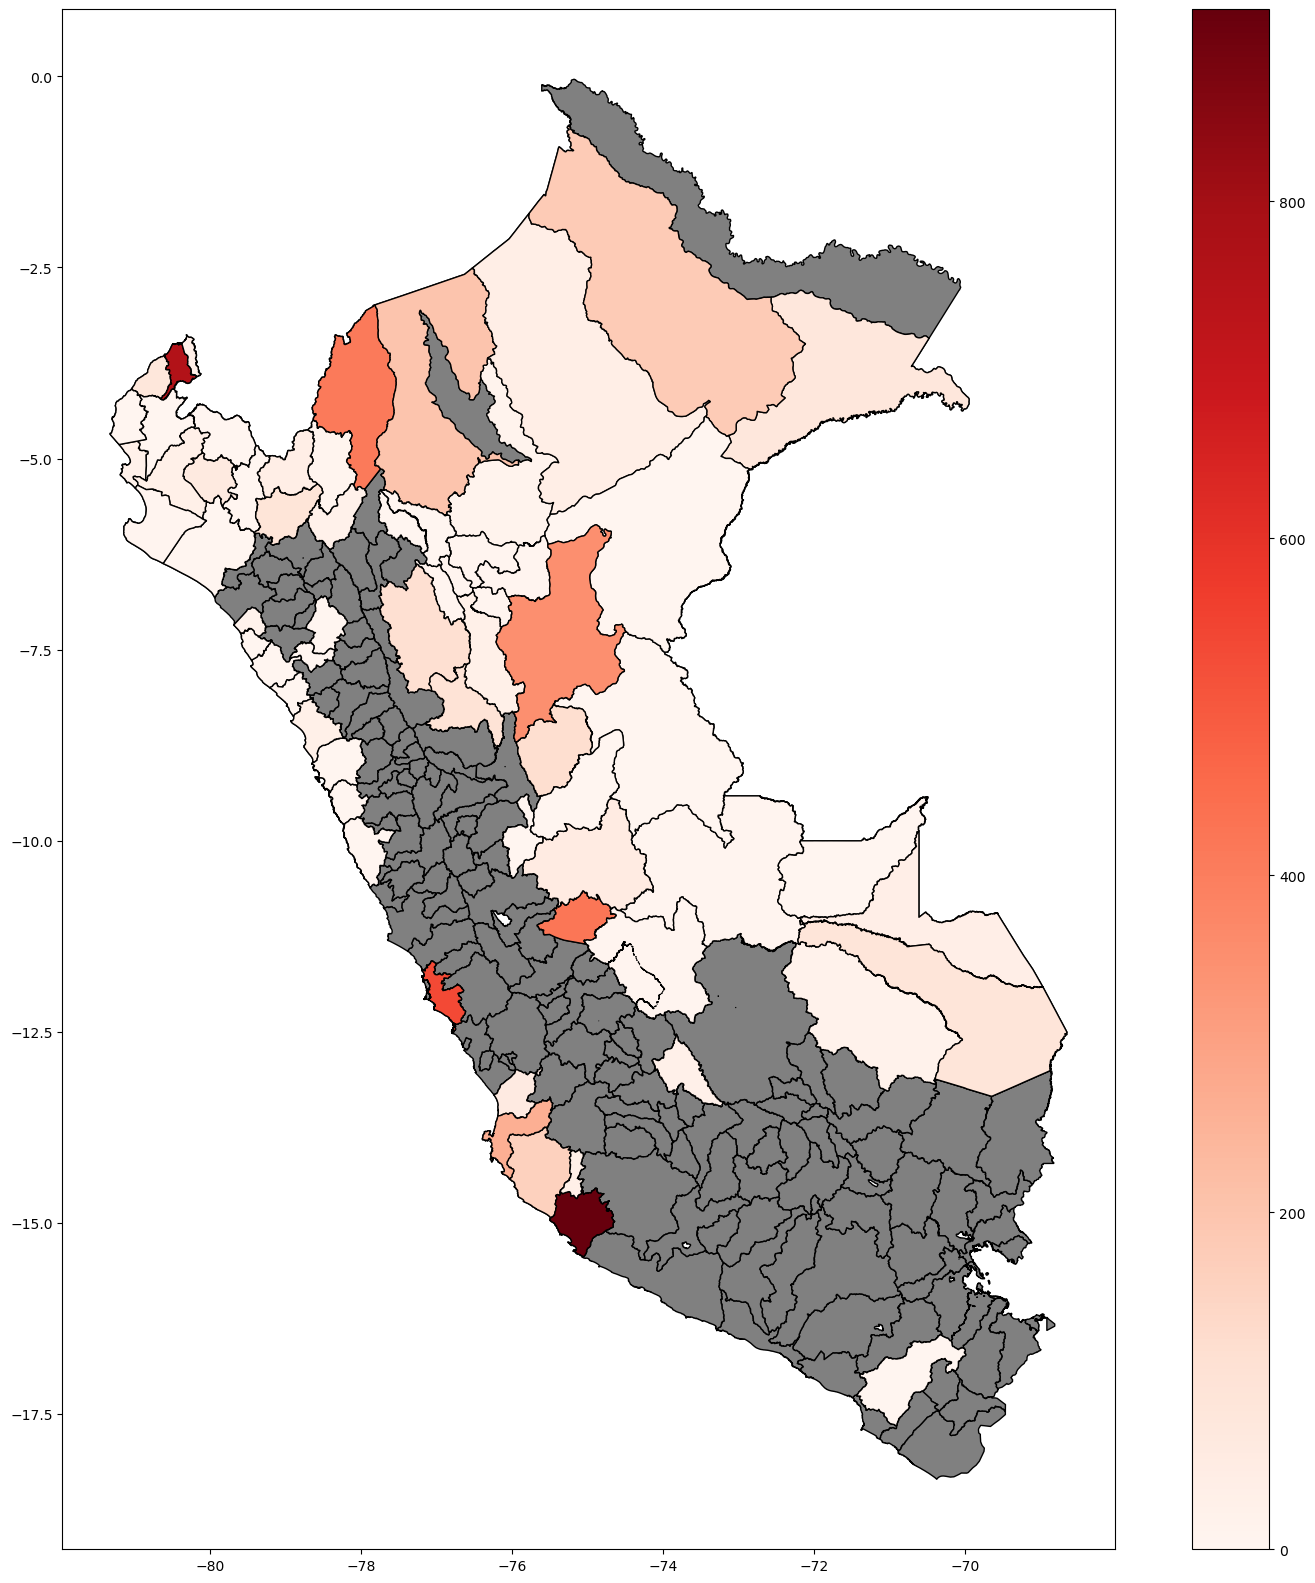

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))

# Primero, dibuja todos los polígonos con un color base que representará los valores NaN.
# Puedes elegir un color que claramente indique que los datos están ausentes, como 'lightgrey'.
dataset21_province.plot(ax=ax, color='grey', edgecolor='black')

# Luego, dibuja encima solo aquellos polígonos que tienen un valor no-NaN en 'Casos'.
dataset21_province.dropna(subset=['Casos']).plot(column='Casos', cmap='Reds', 
                                         edgecolor='black', legend=True, ax=ax)


5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.


6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.